# Jigsaw Puzzle — Milestone 1 Pipeline

This notebook implements a full Milestone-1 pipeline for the puzzle dataset located at `/mnt/data/1.jpg`.

**Features implemented:**
- Automatic grid detection (projection profiles) with fallback to manual grid size
- Tile extraction for 2x2, 4x4, 8x8 puzzles
- Per-tile enhancement (denoise, CLAHE, optional resize)
- Binary mask creation and contour extraction
- Artifacts saving (enhanced images, masks, contours, metadata)
- Visualization helpers (before/after and grid overlay)

Run each cell in order. Modify parameters near the top if needed.


In [20]:
import cv2, os, json, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

INPUT_PATH = "C:/Users/pc/Image-Processing-Project/Gravity_Falls/puzzle_4x4/1.jpg"
OUT_DIR = "C:/Users/pc/Image-Processing-Project/output"
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(os.path.join(OUT_DIR,"tiles"), exist_ok=True)
os.makedirs(os.path.join(OUT_DIR,"visualizations"), exist_ok=True)

FALLBACK_GRID = None
PADDING = 4
RESIZE_TO = None
SAVE_CONTOUR_NPY = True


In [21]:
def edge_sharpening(image, strength=1.8 , kernel_size=5):
    image_float = image.astype(np.float32) / 255.0
    blurred = cv2.GaussianBlur(image_float, (kernel_size, kernel_size), 0)
    sharpened = cv2.addWeighted(image_float, 1.0 + strength, blurred, -strength, 0)
    sharpened = np.clip(sharpened * 255, 0, 255).astype(np.uint8)
    return sharpened


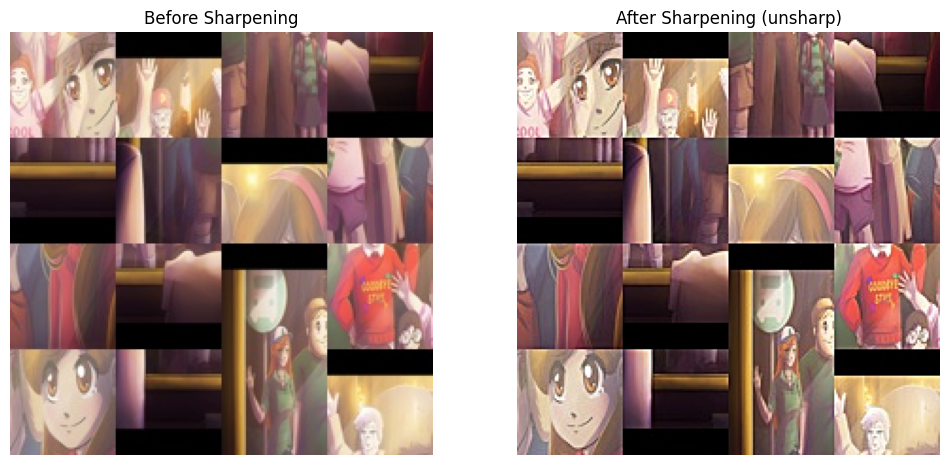

In [22]:
original = cv2.imread(INPUT_PATH, cv2.IMREAD_COLOR)
result = edge_sharpening(original, strength=1.0, kernel_size=5)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Before Sharpening")
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("After Sharpening (unsharp)")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
